In [7]:
#%%
import numpy as np
import sys
sys.path.append(r"C:\Users\alasm\Masteroppgave\w3tp")
import w3t
import os
import h5py
from matplotlib import pyplot as plt
import matplotlib as mpl
import time

import pandas as pd

 
tic = time.perf_counter()
plt.close("all")

In [8]:
section_height = 0.0667
section_width = 0.365
section_length_1 = 2.68
section_length_2 = 2.66

In [9]:
#2D
section_name_US = "MDS_2D_Harmonic"
section_name_DS = "MUS_2D_Harmonic"
h5_input_path = ".\\\H5F\\Single Harmonic\\"

#Load all experiments for US
h5_file_US = os.path.join(h5_input_path, section_name_US)
f_US = h5py.File((h5_file_US + ".hdf5"), "r")

data_set_groups_US = list(f_US)
print(data_set_groups_US)

exps_US = np.array([])

for data_set_group in data_set_groups_US:
    exps_US = np.append(exps_US,w3t.Experiment.fromWTT(f_US[data_set_group]))

tests_with_equal_motion_US = w3t.group_motions(exps_US)
print(tests_with_equal_motion_US)


#Load all experiments for DS
h5_file_DS = os.path.join(h5_input_path, section_name_DS)
f_DS = h5py.File((h5_file_DS + ".hdf5"), "r")

data_set_groups_DS = list(f_DS)
print(data_set_groups_DS)

exps_DS = np.array([])

for data_set_group in data_set_groups_DS:
    exps_DS = np.append(exps_DS,w3t.Experiment.fromWTT(f_DS[data_set_group]))

tests_with_equal_motion_DS = w3t.group_motions(exps_DS)
print(tests_with_equal_motion_DS)

['HAR_INT_MDS_GAP_213D_03_01_01_000', 'HAR_INT_MDS_GAP_213D_03_01_01_001', 'HAR_INT_MDS_GAP_213D_03_01_01_002', 'HAR_INT_MDS_GAP_213D_03_01_02_000', 'HAR_INT_MDS_GAP_213D_03_01_02_001', 'HAR_INT_MDS_GAP_213D_03_01_02_003', 'HAR_INT_MDS_GAP_213D_03_01_03_000', 'HAR_INT_MDS_GAP_213D_03_01_03_001', 'HAR_INT_MDS_GAP_213D_03_01_03_002', 'HAR_INT_MDS_GAP_213D_03_01_04_000', 'HAR_INT_MDS_GAP_213D_03_01_04_001', 'HAR_INT_MDS_GAP_213D_03_01_04_002']
[array([0, 1, 2], dtype=int64), array([3, 4, 5], dtype=int64), array([6, 7, 8], dtype=int64), array([ 9, 10, 11], dtype=int64)]
['HAR_INT_MUS_GAP_213D_03_01_01_000', 'HAR_INT_MUS_GAP_213D_03_01_01_001', 'HAR_INT_MUS_GAP_213D_03_01_01_004', 'HAR_INT_MUS_GAP_213D_03_01_02_000', 'HAR_INT_MUS_GAP_213D_03_01_02_001', 'HAR_INT_MUS_GAP_213D_03_01_02_003', 'HAR_INT_MUS_GAP_213D_03_01_03_001', 'HAR_INT_MUS_GAP_213D_03_01_03_002', 'HAR_INT_MUS_GAP_213D_03_01_03_003', 'HAR_INT_MUS_GAP_213D_03_01_04_000', 'HAR_INT_MUS_GAP_213D_03_01_04_001', 'HAR_INT_MUS_GAP_21

Processing US: Wind tunnel experiment: /HAR_INT_MDS_GAP_213D_03_01_01_001
Processing US: Wind tunnel experiment: /HAR_INT_MDS_GAP_213D_03_01_01_002
Processing US: Wind tunnel experiment: /HAR_INT_MDS_GAP_213D_03_01_02_001
Processing US: Wind tunnel experiment: /HAR_INT_MDS_GAP_213D_03_01_02_003
Processing US: Wind tunnel experiment: /HAR_INT_MDS_GAP_213D_03_01_03_001
Processing US: Wind tunnel experiment: /HAR_INT_MDS_GAP_213D_03_01_03_002
Processing US: Wind tunnel experiment: /HAR_INT_MDS_GAP_213D_03_01_04_001
Processing US: Wind tunnel experiment: /HAR_INT_MDS_GAP_213D_03_01_04_002


ValueError: could not broadcast input array from shape (0,) into shape (24,)

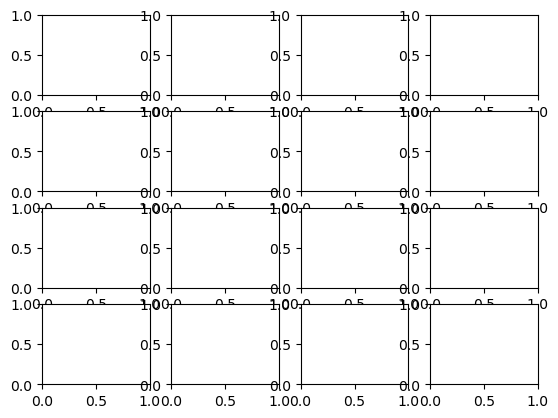

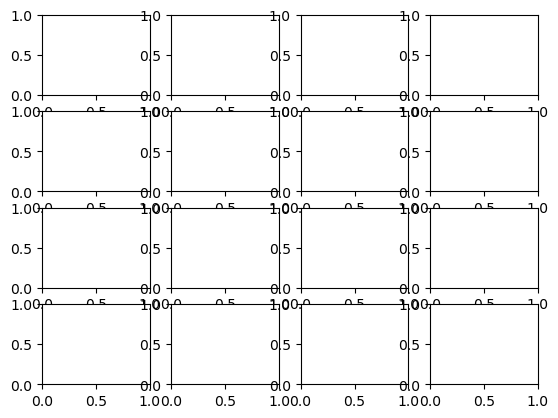

In [10]:
ads_list = []
val_list = []
expf_list = []

fig_damping_2D, _ = plt.subplots(4,4)
fig_stiffness_2D, _ = plt.subplots(4,4)

all_ads_gap2D = w3t.AerodynamicDerivatives4x4()

for k1 in [0,1,2,3]:
    for k2 in range(len(tests_with_equal_motion_US[k1])-1):
        exp0 = exps_US[tests_with_equal_motion_US[k1][0]]
        exp1 = exps_US[tests_with_equal_motion_US[k1][k2+1]]
        print(f"Processing US: {exp1}")
        exp0.filt_forces(6,5)
        exp1.filt_forces(6,5)
        ads_US, val_US, expf_US = w3t.AerodynamicDerivatives4x4.fromWTT(exp0, exp1, section_width, section_length_1, section_length_2, upstream_in_rig=True)
        ads_list.append(ads_US)
        val_list.append(val_US)
        expf_list.append(expf_US)
        all_ads_gap2D.append(ads_US)

    '''
    for k2 in range(len(tests_with_equal_motion_DS[k1])-1):
        exp0 = exps_DS[tests_with_equal_motion_DS[k1][0]]
        exp1 = exps_DS[tests_with_equal_motion_DS[k1][k2+1]]
        print(f"Processing DS: {exp1}")
        exp0.filt_forces(6,5)
        exp1.filt_forces(6,5)
        ads_DS, val_DS, expf_DS = w3t.AerodynamicDerivatives4x4.fromWTT(exp0, exp1, section_width, section_length_1, section_length_2, upstream_in_rig=False)
        ads_list.append(ads_DS)
        val_list.append(val_DS)
        expf_list.append(expf_DS)
        all_ads_gap2D.append(ads_DS)   '''


poly_coeff, k_range = all_ads_gap2D.fit_poly_k()
all_ads_gap2D.plot(fig_damping = fig_damping_2D, fig_stiffness=fig_stiffness_2D, mode='total+poly')


plt.show()

In [ ]:
print(ads_list)

[<w3t._ads4x4.AerodynamicDerivatives4x4 object at 0x0000023FA219D250>, <w3t._ads4x4.AerodynamicDerivatives4x4 object at 0x0000023FA21C8210>, <w3t._ads4x4.AerodynamicDerivatives4x4 object at 0x0000023FA21C9490>, <w3t._ads4x4.AerodynamicDerivatives4x4 object at 0x0000023FA21CA410>, <w3t._ads4x4.AerodynamicDerivatives4x4 object at 0x0000023FA21CAFD0>, <w3t._ads4x4.AerodynamicDerivatives4x4 object at 0x0000023FA21D4150>, <w3t._ads4x4.AerodynamicDerivatives4x4 object at 0x0000023FA21D4F50>, <w3t._ads4x4.AerodynamicDerivatives4x4 object at 0x0000023FA21D5E90>, <w3t._ads4x4.AerodynamicDerivatives4x4 object at 0x0000023FA21D6D50>, <w3t._ads4x4.AerodynamicDerivatives4x4 object at 0x0000023FA21D7910>, <w3t._ads4x4.AerodynamicDerivatives4x4 object at 0x0000023FA21E0610>, <w3t._ads4x4.AerodynamicDerivatives4x4 object at 0x0000023FA21E0F50>, <w3t._ads4x4.AerodynamicDerivatives4x4 object at 0x0000023FA21E1D10>, <w3t._ads4x4.AerodynamicDerivatives4x4 object at 0x0000023FA21E2B10>, <w3t._ads4x4.Aerody

In [ ]:
print(poly_coeff.shape, k_range.shape)
print(poly_coeff, k_range)

(32, 3) (32, 2)
[[-3.5792869   8.06566936 -7.15841892]
 [-4.34709967  8.68254427 -4.41098542]
 [ 0.76852315 -1.08183575  0.12568795]
 [-5.8093132   8.7653013  -3.82768942]
 [-0.47333173  0.73039946 -1.20504704]
 [-0.5780586   0.79973635 -0.34031242]
 [ 0.13466006 -0.15503026 -0.01205619]
 [-0.76428508  1.18907312 -0.56519495]
 [-2.41029335  1.20624683  0.53936578]
 [-3.46141674  1.39498503  3.83188896]
 [-3.11077003  2.15444828 -3.61523737]
 [-3.07980137  4.12576664 -1.30859113]
 [-0.2665722  -0.17632227  0.47345208]
 [ 0.19950751 -0.48809607  0.75410048]
 [-0.36641201  0.34907325 -1.18721017]
 [ 0.16222701 -0.03000078 -0.25919738]
 [ 0.30551451 -2.61783957  0.72655391]
 [ 1.23908316 -2.76483252  4.95341169]
 [-0.71701222  0.490991   -0.66565997]
 [ 1.51951885 -2.41828182  1.27825733]
 [ 0.15566607 -0.17511322  0.09060451]
 [ 0.11182245 -0.09030261  0.89741065]
 [-0.07707136  0.04837204 -0.10153774]
 [ 0.17737701 -0.32733207  0.20703767]
 [ 0.66381431  1.23825343  1.16435339]
 [ 0.7525